# Базовые модели

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from pymorphy2 import MorphAnalyzer

In [6]:
stop_words = set(stopwords.words('russian'))
stop_words.update({
    'это', 'очень', 'вообще', 'всё', 'ещё', 'просто', 'почему', 
    'которые', 'который', 'пока', 'хотя', 'вроде', 'тебе', 'твой',
    'чтото', 'такой', 'такие', 'такое', 'какой', 'какие', 'какое',
    'таким', 'такими', 'такому', 'каким', 'какими', 'какому',
    'свой', 'свои', 'свое', 'своим', 'своими', 'своему'
})

morph = MorphAnalyzer()

def preprocess_text(text, use_lemmatization=True, min_length=2):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    tokens = word_tokenize(text, language='russian')
    cleaned_tokens = []
    for token in tokens:
        if (token not in stop_words and 
            token.isalpha() and 
            len(token) >= min_length):
            
            if use_lemmatization and morph:
                lemma = morph.parse(token)[0].normal_form
                cleaned_tokens.append(lemma)
            else:
                cleaned_tokens.append(token)
    
    return cleaned_tokens

#### TfidVectorizer

In [7]:
tf_idf_vec = TfidfVectorizer(
    tokenizer=preprocess_text,
    min_df=1,
    max_df=0.8,
    ngram_range=(1, 3),
    max_features=5000,
    analyzer='char_wb',
    lowercase=True,
    encoding='utf-8'
)

#### CountVectorizer

In [8]:
count_vec = CountVectorizer(
    tokenizer=preprocess_text,
    min_df=1,
    max_df=0.8,
    ngram_range=(1, 3),
    max_features=5000,
    analyzer='char_wb',
    lowercase=True,
    encoding='utf-8'
)

In [9]:
df = pd.read_csv('../data/raw/labeled.csv')
train_df, test_df = train_test_split(df, random_state=42)

X_train = train_df['comment']
y_train = train_df['toxic']

X_test = test_df['comment']
y_test = test_df['toxic']

#### Logistic Regression

In [10]:
results = {}

Log reg + count vect

In [11]:
log_reg_count_reg_pipeline = Pipeline([
    ('count_vec', count_vec),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

log_reg_count_reg_pipeline.fit(X_train, y_train)
y_pred = log_reg_count_reg_pipeline.predict(X_test)

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

results['lgcv'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.8720510685539828
precision: 0.8056042031523643
racall: 0.7937877480586712
f1: 0.7996523250760539



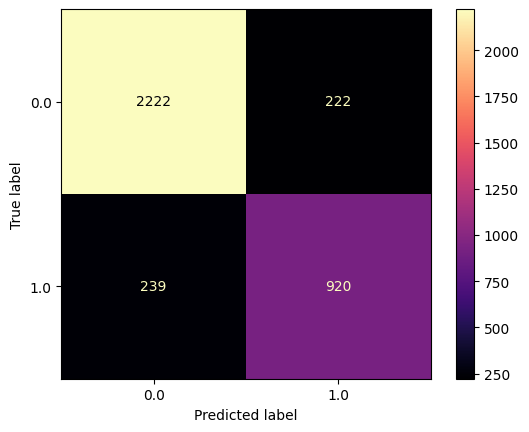

In [12]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='magma'
)

Log reg + tf-idf

In [13]:
log_reg_tf_idf_pipeline = Pipeline([
    ('tf_idf_vec', tf_idf_vec),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])

log_reg_tf_idf_pipeline.fit(X_train, y_train)
y_pred = log_reg_tf_idf_pipeline.predict(X_test)

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

results['lgtfidf'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.8884263114071607
precision: 0.8834853090172239
racall: 0.7523727351164797
f1: 0.8126747437092264



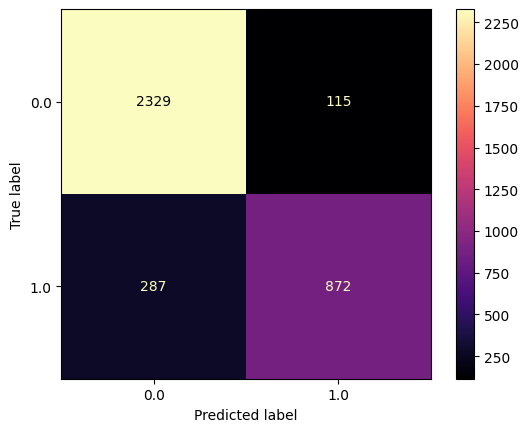

In [14]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='magma'
)

#### Naive Bayess 

NB + count vec

In [15]:
NB_count_vec_pipeline = Pipeline([
    ('count_vec', count_vec),
    ('classifier', MultinomialNB())
])

NB_count_vec_pipeline.fit(X_train, y_train)
y_pred = NB_count_vec_pipeline.predict(X_test)

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

results['nbcv'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.8665001387732445
precision: 0.7560422960725075
racall: 0.8636755823986195
f1: 0.806282722513089



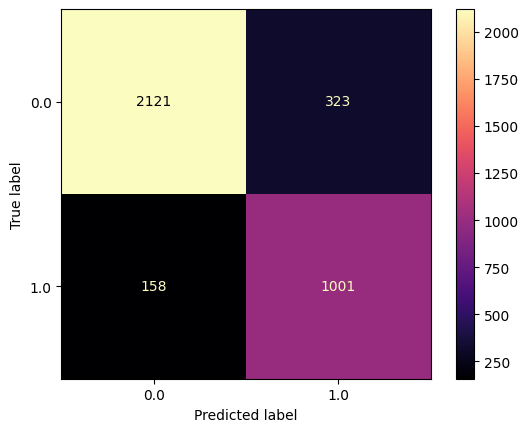

In [16]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='magma'
)

NB + tf-idf

In [17]:
NB_tf_idf_vec_pipeline = Pipeline([
    ('tftf_idf_vec',tf_idf_vec),
    ('classifier', MultinomialNB())
])

NB_count_vec_pipeline.fit(X_train, y_train)
y_pred = NB_count_vec_pipeline.predict(X_test)

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

results['nbtfidf'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.8665001387732445
precision: 0.7560422960725075
racall: 0.8636755823986195
f1: 0.806282722513089



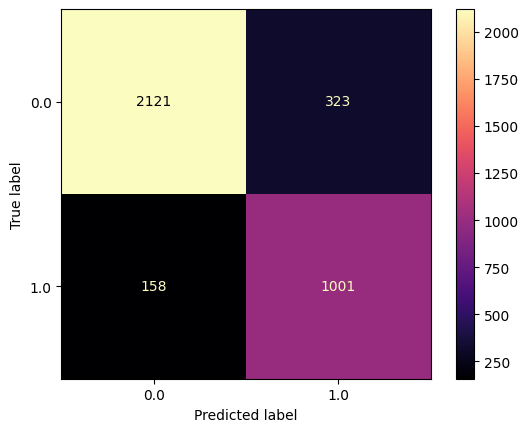

In [18]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='magma'
)

In [19]:
res_df = pd.DataFrame(results).T
res_df

,accuracy,precision,racall,f1
lgcv,0.872051,0.805604,0.793788,0.799652
lgtfidf,0.888426,0.883485,0.752373,0.812675
nbcv,0.866500,0.756042,0.863676,0.806283
nbtfidf,0.866500,0.756042,0.863676,0.806283


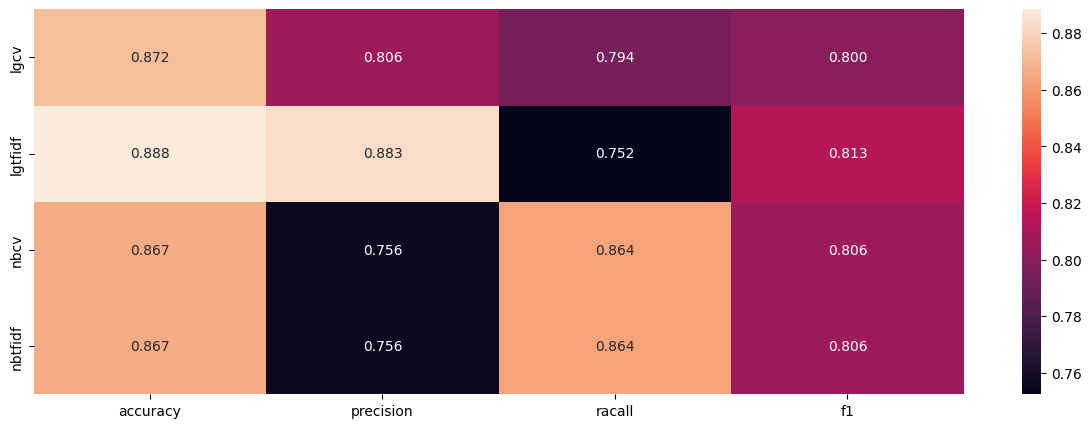

In [20]:
plt.figure(figsize=(15, 5))
sns.heatmap(res_df, annot=True, fmt='.3f')
plt.show()

#### Feature Tuning

Logistic Regression + TF-IDF

In [21]:
results = {}
best_pipelines = {}

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.9983347210657785
precision: 0.9965546942291128
racall: 0.998274374460742
f1: 0.9974137931034482



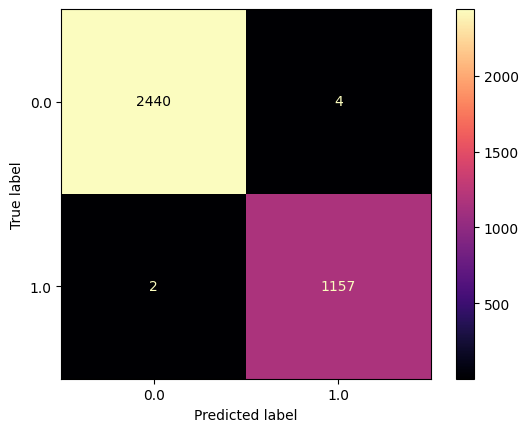

In [22]:
params = {
    'tf_idf_vec__max_features': [1000, 5000, 10000, None],
    'tf_idf_vec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'tf_idf_vec__min_df': [1, 2, 5],
    'tf_idf_vec__max_df': [0.7, 0.8, 0.9, 1.0],
    
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__tol': [1e-4, 1e-3, 1e-2]
}

tf_idf_vec = TfidfVectorizer(
    tokenizer=preprocess_text,
    analyzer='char_wb',
    lowercase=True,
    encoding='utf-8',
)
pipeline = Pipeline([
    ('tf_idf_vec', tf_idf_vec),
    ('classifier', LogisticRegression(random_state=42))
])

rs = RandomizedSearchCV(
    pipeline,
    scoring='accuracy',
    param_distributions=params,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42
)

rs.fit(X_test, y_test)

model = rs.best_estimator_
best_pipelines['lr'] = rs.best_estimator_

y_pred = model.predict(X_test)

results['log_reg'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='magma'
)

NB + Count Vec

c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\илья\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:552: UserWarning: The parameter 'tokenizer' will not be used since 'analyzer' != 'word'
  warnings.warn(



accuracy: 0.9250624479600333
precision: 0.8628571428571429
racall: 0.911993097497843
f1: 0.886744966442953



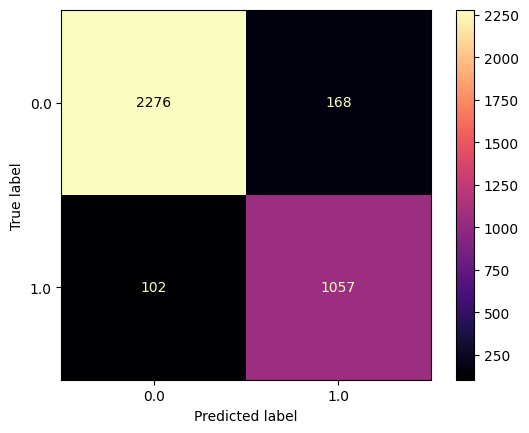

In [23]:
params = {
    'count_vec__max_features': [1000, 5000, 10000, None],
    'count_vec__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'count_vec__min_df': [1, 2, 5],
    'count_vec__max_df': [0.7, 0.8, 0.9, 1.0],
    
    'classifier__alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 7.0, 10.0],
    'classifier__fit_prior': [True, False]
}

count_vec = CountVectorizer(
    tokenizer=preprocess_text,
    analyzer='char_wb',
    lowercase=True,
    encoding='utf-8',
)

pipeline = Pipeline([
    ('count_vec', count_vec),
    ('classifier', MultinomialNB())
])

rs = RandomizedSearchCV(
    pipeline,
    scoring='accuracy',
    param_distributions=params,
    n_iter=30,
    cv=5,
    n_jobs=-1,
    random_state=42
)

rs.fit(X_test, y_test)

model = rs.best_estimator_
best_pipelines['nb'] = rs.best_estimator_

y_pred = model.predict(X_test)

results['nb'] = {
    'accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'racall': recall_score(y_test, y_pred),
    'f1': f1_score(y_test, y_pred) 
}

print(f'''
accuracy: {accuracy_score(y_test, y_pred)}
precision: {precision_score(y_test, y_pred)}
racall: {recall_score(y_test, y_pred)}
f1: {f1_score(y_test, y_pred)}
''')

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, cmap='magma'
)

#### Результаты feature tuning

In [24]:
res_df = pd.DataFrame(results).T
res_df

,accuracy,precision,racall,f1
log_reg,0.998335,0.996555,0.998274,0.997414
nb,0.925062,0.862857,0.911993,0.886745


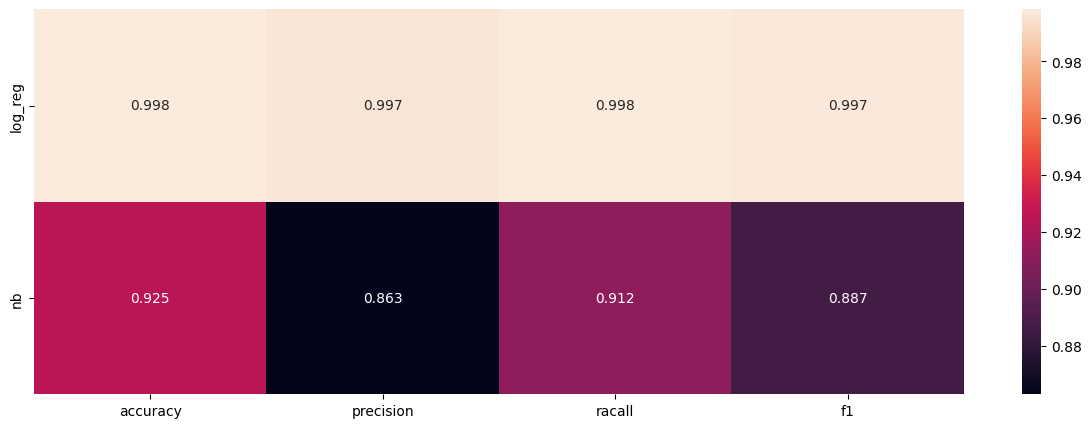

In [25]:
plt.figure(figsize=(15, 5))
sns.heatmap(res_df, annot=True, fmt='.3f')
plt.show()

Сохранение лучшей модели и векторизатора

In [26]:
import joblib

model = best_pipelines['lr'].named_steps['classifier']
vectorizer = best_pipelines['lr'].named_steps['tf_idf_vec']
pipeline = best_pipelines['lr']

joblib.dump(pipeline, '../models/tuned_pipeline.pkl')
joblib.dump(model, '../models/tuned_model.pkl')
joblib.dump(vectorizer, '../models/tuned_vectorizer.pkl')

['../models/tuned_vectorizer.pkl']